

# Project: Investigate a Dataset - [Tmdb-Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

his data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. 

### Question(s) for Analysis
>**Qus1**: What is the top 10 movies that has the most voting?
         

> **Qus2**: What is Top 5 Movies by popularity ?


> **Qus3**: Have the films Budget been affected by the passage of time during period from 1960 to 2015 ?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline 


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: In this Part I will discover My Data

In [3]:
#load Data
df=pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
# i will discover my data by name of columns
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
#its method to show summarize Descriptive statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
#its method to show how many samples and information about dataset if exist missing values or not 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
## it will show you that number of columns = 21  And  number of rows =10866 
df.shape
 

(10866, 21)


## Data Cleaning
> **Tip**: In This Part I will fix or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data 
 

In [8]:
# this code will remove columns that i will not need it at my analysis 
df.drop(['id', 'imdb_id',  'homepage', 'tagline',  'overview', 'production_companies', 'budget_adj', 'revenue_adj','keywords'], axis=1, inplace=True)


In [9]:
# this to check after modify
df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015


In [10]:
# this will show the last five from dataset :
df.tail()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,6/15/66,11,7.4,1966
10862,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,12/21/66,20,5.7,1966
10863,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,1/1/66,11,6.5,1966
10864,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,11/2/66,22,5.4,1966
10865,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,74,Horror,11/15/66,15,1.5,1966


In [11]:
# after i used method tail() i found that there values in budget and revenue contains zero so i droped them :
df.drop(df[df['budget'] == 0].index, inplace=True)
df.drop(df[df['revenue'] == 0].index, inplace=True)

In [12]:
# ichanged name of column "runtime" to : 'Time'
df.rename(columns={'runtime':'Time'},inplace=True)
df.head(3)

,popularity,budget,revenue,original_title,cast,director,Time,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015


#### 
> **Tip**: In this part i will check if exist missing values or not

In [13]:
# i will make check about missing values by using Function
def check_Missing_values():
    return df.isnull().sum()
check_Missing_values()

popularity        0
budget            0
revenue           0
original_title    0
cast              4
director          1
Time              0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [14]:
# droping massing values...
df.dropna(subset=['cast','director'],axis=0,inplace=True)

In [15]:
# recall function method to make shure thta all missing values removed :
check_Missing_values()

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
Time              0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64


> **Tip**:In this part i will check if exist duplicates values or not 

In [16]:
df.duplicated().any()

True

In [17]:
# droping duplicates values
df.drop_duplicates(inplace=True)
df.duplicated().any()

False

##
> **Tip**: :the shape data after cleaning

In [18]:
df.head(3)

,popularity,budget,revenue,original_title,cast,director,Time,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015


<a id='eda'></a>
## Exploratory Data Analysis

> **1-**: In this Part i will explore data and make some visulizations






#### its fast look about My  Dataset

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'vote_average'}>],
       [<AxesSubplot:title={'center':'release_year'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

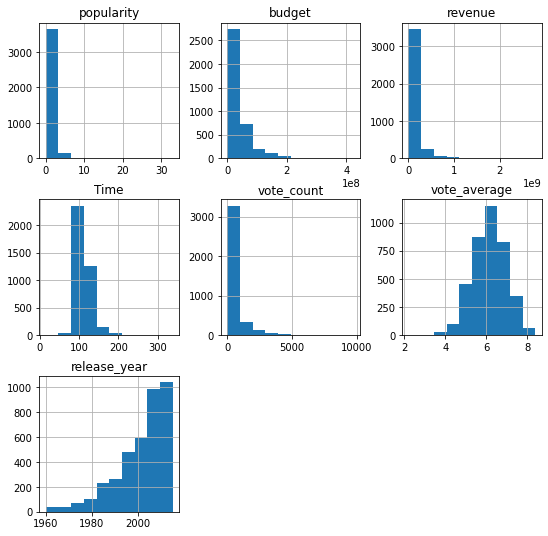

In [19]:
df.hist(figsize=(9,9))

#### explore data by pivot_table

In [20]:
df.pivot_table(index='original_title',values='revenue',columns='release_year',aggfunc=np.mean).head(10)

release_year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
original_title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,60722734.0,NaN,NaN,NaN,NaN,NaN,NaN
10 Things I Hate About You,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"10,000 BC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,266000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102 Dalmatians,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10th & Wolf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,143451.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Rounds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,17280326.0,NaN,NaN,NaN,NaN,NaN,NaN
12 Years a Slave,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187000000.0,NaN,NaN
127 Hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,35692920.0,NaN,NaN,NaN,NaN,NaN


###  Question 1 What is the top 10 movies  that has the most voting?

In [21]:
top_ten=df.sort_values(by='vote_average',ascending=False).head(10)
top_ten

,popularity,budget,revenue,original_title,cast,director,Time,genres,release_date,vote_count,vote_average,release_year
7948,0.283191,1200000,4978922,Stop Making Sense,David Byrne|Tina Weymouth|Chris Frantz|Jerry H...,Jonathan Demme,88,Documentary|Music,11/16/84,23,8.4,1984
4178,7.192039,25000000,28341469,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,142,Drama|Crime,9/10/94,5754,8.4,1994
7269,5.738034,6000000,245066411,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,175,Drama|Crime,3/15/72,3970,8.3,1972
650,4.780419,3300000,13993093,Whiplash,Miles Teller|J.K. Simmons|Melissa Benoist|Aust...,Damien Chazelle,105,Drama|Music,10/10/14,2372,8.2,2014
2875,8.466668,185000000,1001921825,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,152,Drama|Action|Crime|Thriller,7/16/08,8432,8.1,2008
10222,2.377288,22000000,321265768,Schindler's List,Liam Neeson|Ben Kingsley|Ralph Fiennes|Carolin...,Steven Spielberg,195,Drama|History|War,11/29/93,2632,8.1,1993
9758,3.264571,13000000,47542841,The Godfather: Part II,Al Pacino|Robert Duvall|Diane Keaton|Robert De...,Francis Ford Coppola,200,Drama|Crime,12/20/74,2131,8.1,1974
4177,8.093754,8000000,213928762,Pulp Fiction,John Travolta|Samuel L. Jackson|Uma Thurman|Br...,Quentin Tarantino,154,Thriller|Crime,10/14/94,5343,8.1,1994
4179,6.715966,55000000,677945399,Forrest Gump,Tom Hanks|Robin Wright|Gary Sinise|Mykelti Wil...,Robert Zemeckis,142,Comedy|Drama|Romance,7/6/94,4856,8.1,1994
2409,8.947905,63000000,100853753,Fight Club,Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...,David Fincher,139,Drama,10/14/99,5923,8.1,1999


In [22]:
# I will show by names the top five : 
top_ten_title=df.sort_values(by='vote_average',ascending=False)['original_title'].head(10)
top_ten_title

7948            Stop Making Sense
4178     The Shawshank Redemption
7269                The Godfather
650                      Whiplash
2875              The Dark Knight
10222            Schindler's List
9758       The Godfather: Part II
4177                 Pulp Fiction
4179                 Forrest Gump
2409                   Fight Club
Name: original_title, dtype: object

In [23]:
#in adition to using pivot_table to show the rate and name 
top_ten.pivot_table(values='vote_average',index="original_title").sort_values(ascending=False,by='vote_average')

,vote_average
original_title,
Stop Making Sense,8.4
The Shawshank Redemption,8.4
The Godfather,8.3
Whiplash,8.2
Fight Club,8.1
Forrest Gump,8.1
Pulp Fiction,8.1
Schindler's List,8.1
The Dark Knight,8.1


Text(0.5, 1.0, ' the top 10 movies and Musics By voting ')

<Figure size 864x576 with 0 Axes>

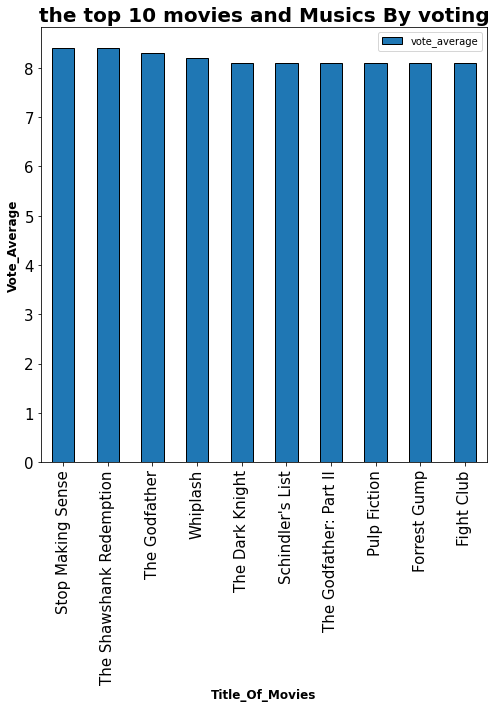

In [24]:
plot.figure(figsize=(12,8))
top_ten.plot(x='original_title',y='vote_average', kind='bar',figsize=(8,8),width=0.5,fontsize='15',edgecolor='black')
plot.xlabel("Title_Of_Movies",fontsize='12',weight='bold')
plot.ylabel("Vote_Average",fontsize='12',weight='bold')
plot.title(" the top 10 movies and Musics By voting ",fontsize='20',weight='bold')


## resulats

* Above are the top 10 movies  by vote ratings.
*  Stop Making Sense and The Shawshank Redemption get high vote rating by 8.4 vote 

### Question 2: What is Top 5 Movies by popularity ?

In [25]:
#to check The most popular Value
df['popularity'].max()

32.985763

In [26]:
# i will discover my data to collect between popularity and movies names :
top_five_movies_by_pop=df.pivot_table(values='popularity',index="original_title").sort_values(ascending=False,by='popularity').head(5)
top_five_movies_by_pop

,popularity
original_title,
Jurassic World,32.985763
Mad Max: Fury Road,28.419936
Interstellar,24.949134
Guardians of the Galaxy,14.311205
Insurgent,13.112507


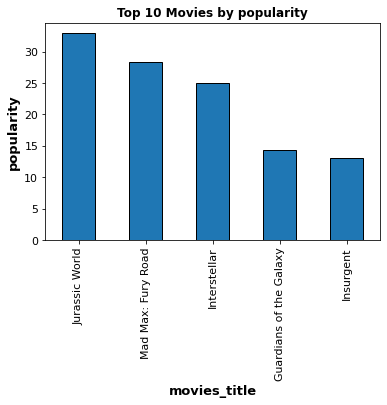

In [27]:
top_five_movies_by_pop.popularity.plot(kind='bar',fontsize=11,edgecolor='black')
plot.title('Top 10 Movies by popularity',weight='bold')
plot.ylabel('popularity',fontsize=13,weight='bold')
plot.xlabel('movies_title',fontsize=13,weight='bold');

## results

* Above are the top 5 movies by popularity.
* After Analysis And Visulaization I found That Movie Jurassic World get high popularity from all movies it take about (32.985763)

###  Question 3 : Have the films Budget been affected by the passage of time during period from 1960 to 2015 ?

In [28]:
# i made pivot table to make connect betwen year overtime and Budget :
year_budget=df.pivot_table(values='budget',index='release_year')
year_budget

,budget
release_year,
1960,4.161390e+06
1961,3.863700e+06
1962,5.635714e+06
1963,1.018583e+07
1964,4.847880e+06
1965,1.176000e+07
1966,6.453600e+06
1967,7.346154e+06
1968,5.994444e+06


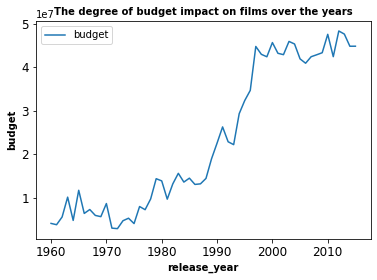

In [29]:
year_budget.plot(kind='line' , fontsize='12')
plot.xlabel('release_year',weight='bold')
plot.ylabel('budget',weight='bold')
plot.title('The degree of budget impact on films over the years',size = 10,weight='bold')
plot.show()

## results

* Above the Are relation Between Years and Budget  How it effected 
* after analysis and visualization  The budget in the sixties and seventies, i.e. before the millennium, was very small due to several reasons, including that the development had not reached what it was, and the films, whether or the music were not like our present time.
* Because if we look at the present time, for example, 2010, 2011, 2015, and 2007,2002, we find that the budget for films is constantly rising due to the availability of possibilities that did not exist before for example technology .


<a id='conclusions'></a>
## Conclusions

* The budget for films  in the past was small compared to our current time
* Higher popularity movies were found to be more popular than their lower counterparts.
* Movie Stop Making Sense and The Shawshank Redemption get high vote rating by 8.4 vote 



#### limitation: 
limitation: The are some limitation in the dataset such as erroneous values on budget and revenue that effects a lot in the analysis so I had to drop many rows based on that. Although there are some missing values in some columns and i found duplicates values Also I did not need those columns in my analysis so dropping them was the best solution.
and i did rename one column becuse i found it not suitable.
Since there are around 10,500 data points, we do not use scatter plot as this could run into the issue of over-plotting so I pushed it away far my visualization

In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1